<img src="img/LinkedIN Header.jpg">

# Cleaning with Pandas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### 1. Load `rock.csv` and do an initial examination of its data columns.

In [5]:
df = pd.read_csv('data/rock.csv')
df.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Song Clean    2230 non-null   object
 1   ARTIST CLEAN  2230 non-null   object
 2   Release Year  1653 non-null   object
 3   COMBINED      2230 non-null   object
 4   First?        2230 non-null   int64 
 5   Year?         2230 non-null   int64 
 6   PlayCount     2230 non-null   int64 
 7   F*G           2230 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 139.5+ KB


### 2.  Clean up the column names.

Clean up the column names. Remove spaces and capitals.

In [7]:
df.columns

df.rename(columns = {'Song Clean':'Song', 'ARTIST CLEAN':'Artist','Release Year':'Release', 'COMBINED':'Combined',
                     'First?':'First','Year?':'Year'}, inplace = True)

### 3. How many missing values are there?

Subset on the rows containing missing release years using the command `.isnull()` on the release column and the resulting boolean list for filtering.

In [8]:
df.Release.isnull().sum()

577

### 4. Find why the `release` column coded as object type.

In [9]:
df.Release.sample(10) # there are nans but these are floats
# it's because the years have been entered as strings 
type(df.loc[0,'Release'])

str

In [10]:
df.Release.unique()

array(['1982', nan, '1981', '1980', '1975', '2000', '2002', '1992',
       '1985', '1993', '1976', '1995', '1979', '1984', '1977', '1990',
       '1986', '1974', '2014', '1987', '1973', '2001', '1989', '1997',
       '1971', '1972', '1994', '1970', '1966', '1965', '1983', '1955',
       '1978', '1969', '1999', '1968', '1988', '1962', '2007', '1967',
       '1958', '1071', '1996', '1991', '2005', '2011', '2004', '2012',
       '2003', '1998', '2008', '1964', '2013', '2006', 'SONGFACTS.COM',
       '1963', '1961'], dtype=object)

### 5. Convert to a more appropriate format.

In [11]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan #numpy nans are classed as floats


In [12]:
df.Release = df.Release.map(convert_to_float)

In [13]:
df.Release

0       1982.0
1          NaN
2       1981.0
3       1980.0
4       1975.0
         ...  
2225       NaN
2226    1981.0
2227    1975.0
2228    1983.0
2229    1973.0
Name: Release, Length: 2230, dtype: float64

### 6. Obtain summary statistics for the converted release column.

In [14]:
df.Release.describe()

count    1652.000000
mean     1978.019976
std        24.191247
min      1071.000000
25%      1971.000000
50%      1977.000000
75%      1984.000000
max      2014.000000
Name: Release, dtype: float64

In [15]:
# fix the 'odd' values here by overwriting them
df[df.Release == 1071]

,Song,Artist,Release,Combined,First,Year,PlayCount,F*G
547,Levon,Elton John,1071.0,Levon by Elton John,1,1,8,8


In [16]:
# quick google to check the actual release year is 1971
df.loc[547,'Release'] = 1971 # update to the correct value
df.loc[[547]]

,Song,Artist,Release,Combined,First,Year,PlayCount,F*G
547,Levon,Elton John,1971.0,Levon by Elton John,1,1,8,8


In [17]:
df.Release.describe()

count    1652.000000
mean     1978.564770
std         9.308823
min      1955.000000
25%      1971.000000
50%      1977.000000
75%      1984.000000
max      2014.000000
Name: Release, dtype: float64

### 7. What is the role of the year column? How does it relate to the release year?

In [18]:
df.loc[:,['Release', 'Year']] # the year column contains binary entries; 1 for release year present in data, 0 for no release year available

,Release,Year
0,1982.0,1
1,NaN,0
2,1981.0,1
3,1980.0,1
4,1975.0,1
...,...,...
2225,NaN,0
2226,1981.0,1
2227,1975.0,1
2228,1983.0,1


### 8. Plot the distributions of the release year and playcount

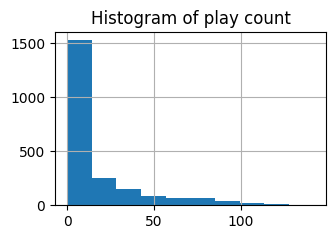

In [15]:
fig, ax = plt.subplots(figsize=(3.5, 2.25))

df.PlayCount.hist()

plt.title('Histogram of play count')
plt.show()

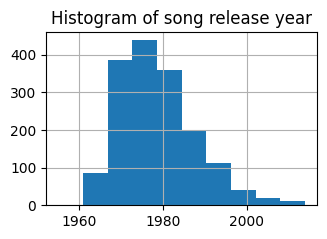

In [16]:
fig, ax = plt.subplots(figsize=(3.5, 2.25))

df.Release.hist()

plt.title('Histogram of song release year')
plt.show()

### 9. Plot the playcount versus the release year

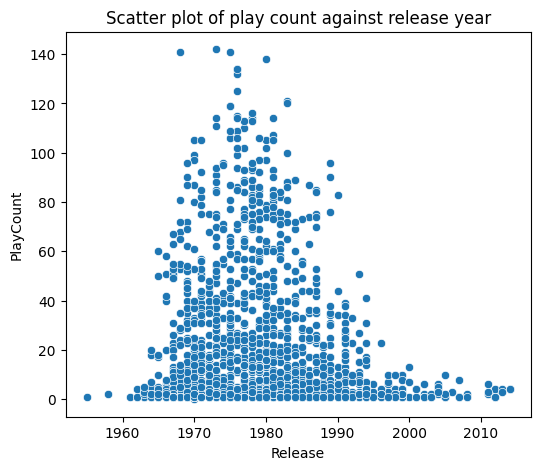

In [17]:
fig, ax = plt.subplots(figsize=(6, 5))

sns.scatterplot(x = "Release", y = "PlayCount", data = df)

plt.title('Scatter plot of play count against release year')
plt.show()

### 10. Which 10 years have the most releases?

In [19]:
df.Release.value_counts().iloc[:10]

Release
1973.0    104
1977.0     83
1975.0     83
1970.0     81
1971.0     76
1969.0     72
1980.0     70
1978.0     64
1979.0     63
1967.0     61
Name: count, dtype: int64

### 11. Which artists have the most songs?

In [19]:
df['Artist'].value_counts()[:10]

The Beatles                      100
Led Zeppelin                      69
Rolling Stones                    55
Van Halen                         44
Pink Floyd                        39
The Who                           31
Aerosmith                         31
AC/DC                             29
Tom Petty & The Heartbreakers     29
Heart                             24
Name: Artist, dtype: int64